Всем привет! Пришло время нашей первой домашней работы не на степике. Надеюсь, будет весело :)

Так как, `pandas` вы еще не проходили, то я вам немного помогу. Эту домашку можно делать как в питоне, так и в R, само задание будет написано в `Google Colaboratory`.

In [1]:
# Pandas понадобится нам для чтения денных
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.chdir("/home/ministreliya/Downloads/")

In [3]:
# В переменную data_path надо положить путь до данных
#data_path = "data"
data_path = os.getcwd()
expression_data = pd.read_csv(f"{data_path}/homework_lecture_5_data.csv", index_col=0)
expression_data.head()

,TMCC1,RANBP3,GABRG3,ARRDC5,LRP3,TIMM23,TBPL1,BIRC8,TTC28,C19orf66,...,MAGEA6,IL4I1,LCN12,SMG6,C1orf100,WDR75,ZBTB26,SPTY2D1,PLEKHA2,Cell_type
0,33.888550,38.384340,0.044721,1.385159,11.341853,105.193306,26.463990,0.000000,1.537874,27.645407,...,21.332443,1.397932,0.000000,23.136585,0.001902,60.218548,6.307399,9.577274,44.026940,B_cell
1,16.497124,35.054090,0.314645,4.329797,8.649321,50.577618,16.684614,0.000000,1.796609,13.715611,...,1.199440,159.147130,0.259244,18.986986,0.310971,25.818224,4.193348,14.181196,35.779896,B_cell
2,5.449933,31.783958,0.002949,2.137536,1.750892,109.201050,35.265984,0.011501,0.878889,19.361662,...,0.002924,25.256378,0.000000,32.941895,0.000000,99.555990,8.323141,29.321960,30.816538,B_cell
3,33.362240,56.147026,0.037295,1.604904,6.807299,100.141620,25.446817,0.000000,2.502662,12.745437,...,0.000000,14.509516,0.063003,19.036896,0.000000,49.394980,4.655794,17.683067,47.143270,B_cell
4,50.188510,30.165264,0.039678,1.501439,1.619954,46.916790,28.053373,0.018181,1.165164,30.318027,...,0.033807,93.681190,0.031816,19.094831,0.000000,20.201437,6.935232,20.769829,53.935143,B_cell


In [4]:
b_cells_expression_data = expression_data.query("Cell_type == 'B_cell'")
nk_cells_expression_data = expression_data.query("Cell_type == 'NK_cell'")

В этом задании мы будем работать с данными об экспрессии генов в друх клеточных типах: в B-клетках и в NK-клетках. Выясним, средняя экспрессия каких генов значимо различается в этих клеточных типах.

Я буду показывать примеры на одном гене, а на основе них вы сможете сделать похожие задачи для всех генов.

In [5]:
example_gene = "TMCC1"

## Задание 1

**2 баллов**

Посмотрим на распределение экспрессий гена `TMCC1` в обоих клеточных типах.

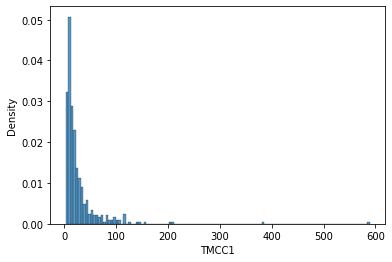

In [6]:
sns.histplot(b_cells_expression_data[example_gene], stat="density");

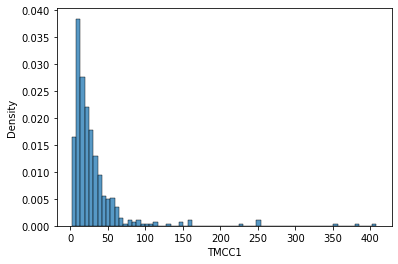

In [7]:
sns.histplot(nk_cells_expression_data[example_gene], stat="density");

Кажется, что они немного различаются. Для начала давайте попробуем еще раз проверить центральную предельную теорему.

**Задание:**

Напишите функцию, которая будет принимать на вход экспрессии гена, семплировать их них выборки размера `sample_size`, считать среднюю экспрессию и повторять это `n_samples` раз. Примените эту функцию к экспрессиям гена `TMCC1` в обоих клеточных типах, визуализируйте их. Отличаются ли средние экспрессии данного гена у этих клеточных типов?
 
Сигнатура функции:

```python
def demonstrate_clt(expressions, sample_size, n_samples):
    mean_expressions = []

    return mean_expressions
```

In [8]:
def demonstrate_clt(expressions, sample_size, n_samples):
    mean_expressions = [np.mean(np.random.choice(expressions, sample_size)) for i in range(n_samples)]
    return mean_expressions

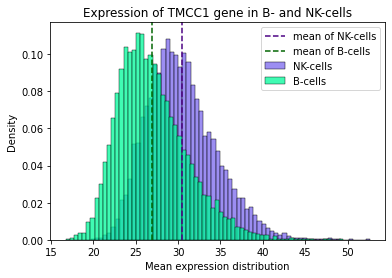

In [14]:
b_cells = b_cells_expression_data[example_gene]
nk_cells = nk_cells_expression_data[example_gene]

clt_nk = demonstrate_clt(nk_cells, 100, 10000)
clt_b = demonstrate_clt(b_cells, 100, 10000)

plt.title(f'Expression of {example_gene} gene in B- and NK-cells')
sns.histplot(clt_nk, stat="density", color="#7B68EE", label='NK-cells')
plt.axvline(np.mean(clt_nk), c="#4B0082", ls='--', label='mean of NK-cells')
sns.histplot(clt_b, stat="density", color='#00FA9A', label='B-cells')
plt.axvline(np.mean(clt_b), c='#006400', ls='--', label='mean of B-cells')
plt.xlabel('Mean expression distribution')
plt.legend()
plt.show()

А теперь посчитайте 95% доверительные интервалы для обоих распределений (примем тот факт, что средние распределены нормально для обоих клеточных типов) и скажите, отличается ли средняя экспрессия данного гена между клеточными типами?

In [16]:
l_nk = -1.96 * np.std(nk_cells) / (len(nk_cells)**0.5) 
r_nk = 1.96 * np.std(nk_cells) / (len(nk_cells)**0.5)

nk_conf_interval = sorted([i for i in nk_cells if l_nk < (i - np.mean(nk_cells)) < r_nk])
print(f'Expression of {example_gene} for NK-cells has {nk_conf_interval[0], nk_conf_interval[-1]} 95% confidence interval')


l_b = -1.96 * np.std(b_cells) / (len(b_cells)**0.5) 
r_b = 1.96 * np.std(b_cells) / (len(b_cells)**0.5)

b_conf_interval = sorted([i for i in b_cells if l_b < (i - np.mean(b_cells)) < r_b])
print(f'Expression of {example_gene} for B-cells has {b_conf_interval[0], b_conf_interval[-1]} 95% confidence interval')

Expression of TMCC1 for NK-cells has (26.938063, 33.801617) 95% confidence interval
Expression of TMCC1 for B-cells has (23.49602, 30.344753000000004) 95% confidence interval


## Задание 2

**4 баллов**

Вспомнили центральную предельную теорему и то, как считать доверительные интервалы в простом случае, теперь давайте воспользуемся библиотечной реализацией для того, чтобы протестировать уже все гены. 

In [17]:
import scipy.stats as st

Посчитаем доверительные интервалы для нашего демонстрационного гена в обоих клеточных типах:

In [18]:
# B клетки
st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(b_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(b_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(b_cells_expression_data[example_gene])) # Стандартная ошибка среднего

(23.420272072079285, 30.5376715863207)

In [19]:
# NK клетки
st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(nk_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(nk_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(nk_cells_expression_data[example_gene])) # Стандартная ошибка среднего

(26.846104688075624, 34.016534512724384)

Напишите функцию для проверки того, что доверительные интервалы пересекаются. На лекции мы тестировали гипотезы для равенства среднего выборки заданному числу и проверяли, попало ли оно в границы этого интервала или нет, если оно оказывалось за ними, то мы говорили, что средние отличаются. Здесь же мы имеем дело с двумя выборками, поэтому будем проверять, пересекаются ли доверительные интервалы, и, если нет, то говорить о том, что средние в выборках отличаются.

```python
def check_intervals_intersect(first_ci, second_ci):   

    return are_intersect # True or False
```

In [21]:
def check_intervals_intersect(first_ci, second_ci):   
    intrsct = (first_ci[0] < second_ci[1]) & (second_ci[0] < first_ci[1])
    return intrsct

Теперь для каждого гена посчитайте доверительные интервалы в обоих клеточных типах, и проверьте, пересекаются ли они? Результаты можно добавлять в список, например:

```python
ci_test_results = [True, False, ..., True]
```

In [24]:
ci_test_results = []

for i in expression_data.columns[:-1]:
    b_data = b_cells_expression_data[i]
    nk_data = nk_cells_expression_data[i]
    
    b_ci = st.t.interval(alpha=0.95, df=len(b_data) - 1, 
                       loc=np.mean(b_data), scale=st.sem(b_data))
    
    nk_ci = st.t.interval(alpha=0.95, df=len(nk_data) - 1, 
                        loc=np.mean(nk_data), scale=st.sem(nk_data))
    
    ci_test_results.append(check_intervals_intersect(b_ci, nk_ci))
    
print(ci_test_results[0:5])

[True, False, True, False, True]


Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ci(first_table, second_table):
    # dge - differential gene expression

    return ci_test_results
```

In [25]:
def check_dge_with_ci(first_table, second_table):
    ci_test_results = []

    for i in first_table.columns:
        one_dge, two_dge = first_table[i], second_table[i]
        one_ci = st.t.interval(alpha=0.95, df=len(one_dge) - 1, 
                             loc=np.mean(one_dge), scale=st.sem(one_dge))
        two_ci = st.t.interval(alpha=0.95, df=len(two_dge) - 1, 
                             loc=np.mean(two_dge), scale=st.sem(two_dge))
        ci_test_results.append(check_intervals_intersect(one_ci, two_ci))

    return ci_test_results


stat_check = check_dge_with_ci(b_cells_expression_data.iloc[:, :-1], 
                               nk_cells_expression_data.iloc[:, :-1])

ci_test_results == stat_check

True

## Задание 3

**4 баллов**

Давайте теперь применим для той же задачи `z-критерий`. Будем считать, что в данном случае $\alpha$ = 0.05, и если полученное `p-value` будет меньше, то экспрессия генов значимо отличается.

In [26]:
from statsmodels.stats.weightstats import ztest

In [27]:
# Наш излюбленный ген
ztest(
    b_cells_expression_data[example_gene],
    nk_cells_expression_data[example_gene]
)

(-1.342743404188514, 0.17935507499860148)

Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ztest(first_table, second_table):
    # dge - differential gene expression

    return z_test_results
```

In [28]:
def check_dge_with_ztest(first_table, second_table, alpha=0.05):
    z_test_results = []

    for x in first_table.columns:
        res = ztest(first_table[x], second_table[x])[1] < 0.05
        z_test_results.append(res)

    return z_test_results

## Задание 4

**10 баллов**

Теперь пришла пора оформить все ваши старания в виде программы. Напишите программу, которая принимает на вход следующие аргуметры:

1. `first_cell_type_expressions_path` &ndash; путь до таблицы с экспрессиями генов для одного клеточного типа;
2. `second_cell_type_expressions_path` &ndash; путь до таблицы с экспрессиями генов для второго клеточного типа;
3. `save_results_table` &ndash; название таблицы с результатами.

Считывать аргументы можно любым удобным способом (например, `input`, `argparse`).

Как читать данные при помощи пандаса мы уже знаем, осталось понять, как записывать результаты. Допустим, вы записывали результаты ваших тестов в списки, тогда создать пандасовский датафрейм можно следующим образом:

In [29]:
ci_test_results = [True, False, True]
z_test_results = [True, True, True]
# Опционально можно также сохранять p-value для z-критерия
z_test_p_values = [0.004, 0.01, 0.0001]
# Также сохраните разницу в средних экспрессиях между 1 и 2 таблицами для каждого гена,
# чтобы было понять, уменьшается или увеличивается экспрессия гена
mean_diff = [-10, 10, 0.5]

# Созданим словарь {'название колонки': список_значений}
results = {
    "ci_test_results": ci_test_results,
    "z_test_results": z_test_results,
    "z_test_p_values": z_test_p_values,
    "mean_diff": mean_diff
}

# Из словаря делаем датафрейм
results = pd.DataFrame(results)
results.head()

,ci_test_results,z_test_results,z_test_p_values,mean_diff
0,True,True,0.0040,-10.0
1,False,True,0.0100,10.0
2,True,True,0.0001,0.5


In [30]:
# Сохраним таблицу в .csv файл
results.to_csv("path_to_your_awesome_results.csv")

# Task 4

In [33]:
def programm_DE(first_cell_type_expressions_path, 
                 second_cell_type_expressions_path,
                 results_table):
    
    frst = pd.read_csv(first_cell_type_expressions_path, index_col=0)
    sec = pd.read_csv(second_cell_type_expressions_path, index_col=0)

    ci_test_results, z_test_results, z_test_p_values, mean_diff, names  = [], [], [], [], []
    
    if set(frst.columns) != set(sec.columns):
        print("""The two datasets have unequal sets of columns. 
    The analysis will be continued with the overlapping ones.""")
  
    overlap = set(frst.columns) & set(sec.columns)

    for i in overlap:
        frst_ci = st.t.interval(alpha=0.95, df=len(frst[i]) - 1, 
                           loc=np.mean(frst[i]), scale=st.sem(frst[i]))
        sec_ci = st.t.interval(alpha=0.95, df=len(sec[i]) - 1, 
                           loc=np.mean(sec[i]), scale=st.sem(sec[i]))
        intrsct = (frst_ci[0] < sec_ci[1]) & (sec_ci[0] < frst_ci[1])
        ci_test_results.append(intrsct)
        names.append(i)

    z_res = ztest(frst[i], sec[i])
    z_test_results.append(z_res[1] < 0.05)
    z_test_p_values.append(z_res[1])

    mean_different = np.mean(frst[i]) - np.mean(sec[i])
    mean_diff.append(mean_different)

    results = {'name': names,
             "ci_test_results": ci_test_results,
             "z_test_results": z_test_results,
             "z_test_p_values": z_test_p_values,
             "mean_diff": mean_diff}
  
    results = pd.DataFrame(results)
    results.to_csv(f"{results_table}.csv", index=False)

In [ ]:
frst_dataset = input('Please, set the path to your first dataset: ')
sec_dataset = input('Please, set the path to your second dataset: ')
output_name = input('Please, set the name of the output .csv: ')

programm_DE(frst_dataset, sec_dataset, output_name)

## Задание 5

**0.5 баллов (доп.)**

В онлайне сложно знакомиться, а особенно сейчас. Созвонитесь с кем-то из других студентов и прикрипите сюда скрин вашего созвона. Можно коротко описать, о чем вы говорили)